House Prices - Advanced Regression Techniques

            Competition Kaggle

In [1]:
#importar pandas e numpy
import pandas as pd
import numpy as np

In [3]:
#Importar dataset de treino
base = pd.read_csv("train.csv")

In [4]:
#ver a base de dados
base.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Visualizar tamanho da base de dados
base.shape

(1460, 81)

In [7]:
#Informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Começar as explorar os dados

In [12]:
#Analisar dados com valores vazios
base.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [13]:
#Eliminar colunas que tenham mais de 10% dos valores vazios 
colunas_para_remover = base.columns[(base.isnull().sum()/base.shape[0]) > 0.1]
colunas_para_remover

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [14]:
#Efetivar a eliminação 
base = base.drop(colunas_para_remover, axis = 1) #axis=0 linha, axis=1 coluna

*Limpar e completar os valores vazios (nesse caso e melhor sera completar com -1 para nao confundir dados 0 e 1)
*Primeiro valos selecionar apenas colunas com valores numericos

In [15]:
#Selecionar colunas numericas
colunas_numericas = base.columns[base.dtypes != "object"]
colunas_numericas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
#Criar nossa nova base com essas colunas
base_nova = base.loc[:,colunas_numericas]
base_nova.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
#Verificar os dados que estao vazios
base_nova.isnull().sum()

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [19]:
#Trocar os dados vazios por -1 (nao sao dados muito relevantes mas nao podem ficar vazios)
base_nova = base_nova.fillna(-1)

In [20]:
#Visualizar informações sobre a variavel que vamos prever
base_nova["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/var/folders/21/kht1g5ps5b9dh9hfts6h6vc00000gp/T/ipykernel_71617/1639432836.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(base_nova["SalePrice"]).set_title("SalePrice")


Text(0.5, 1.0, 'SalePrice')

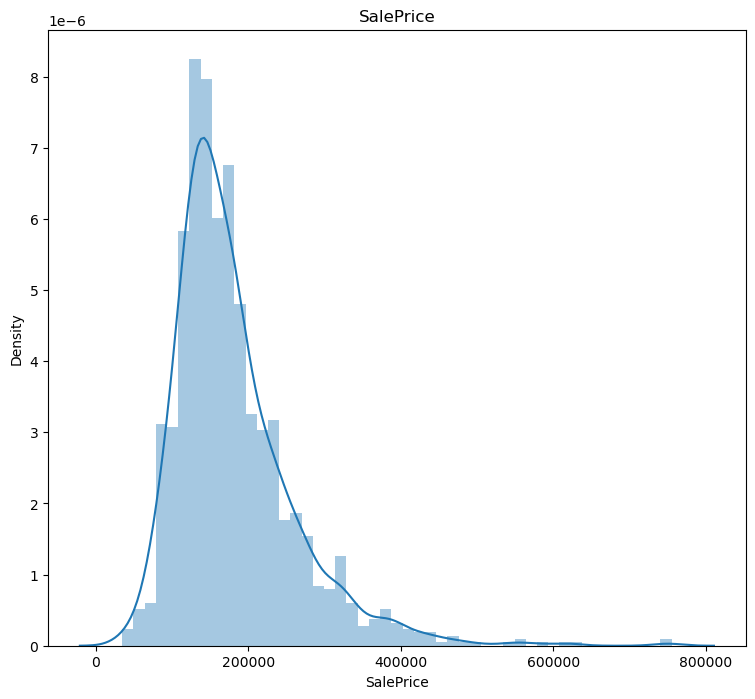

In [22]:
#Visualizar graficamente
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
sns.distplot(base_nova["SalePrice"]).set_title("SalePrice")

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>

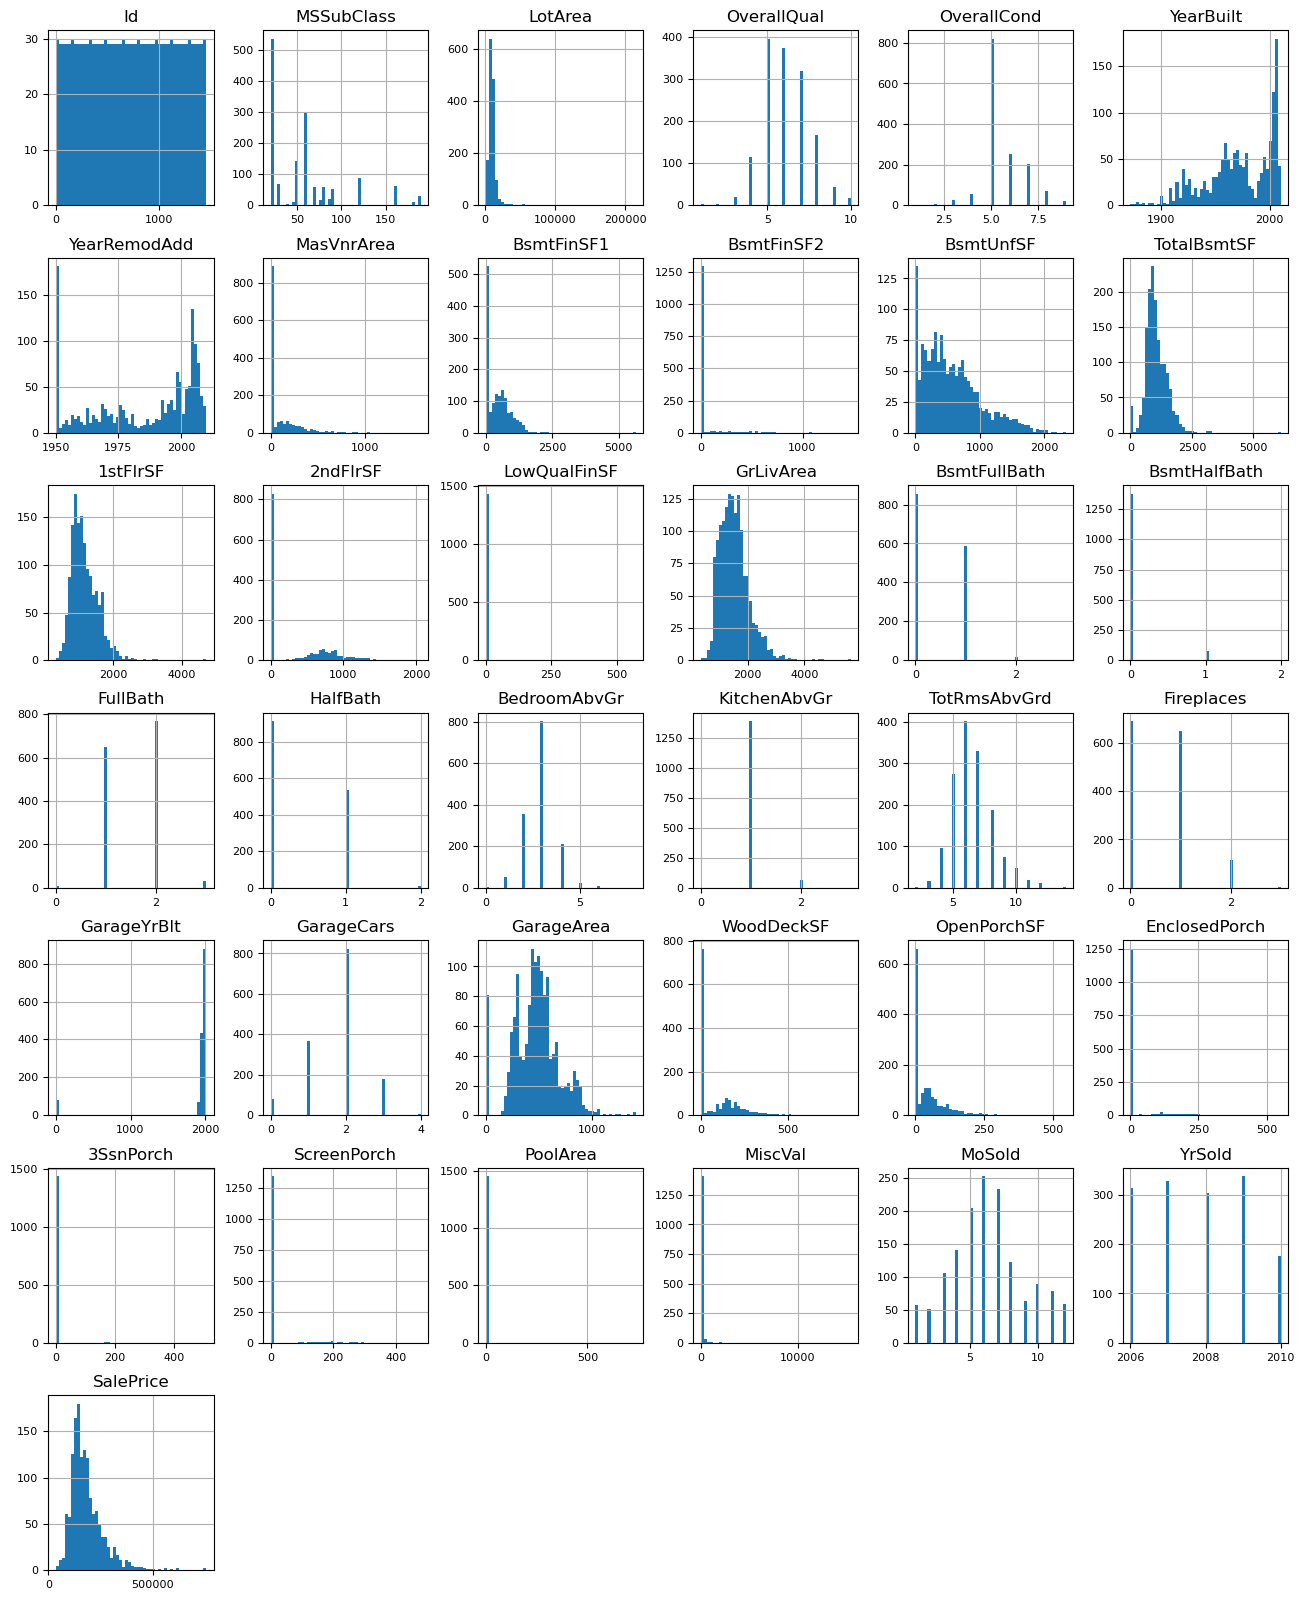

In [24]:
#Breve análise dos outros dados das colunas
base_nova.hist(figsize=(16, 20), bins = 50, xlabelsize = 8, ylabelsize = 8)

*Criar Modelo e fazer previsões


In [26]:
#Importar do sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [46]:
#Separação das variaveis 
X = base_nova.drop("SalePrice", axis=1)
y = base_nova.SalePrice

In [47]:
#Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #usei exemplos da documentação

Usei as Documentações como exemplo
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [48]:
#Criando o modelo de treinamento 
reg = LinearRegression().fit(X_train, y_train)

In [49]:
#Fazer a previsão do dados de teste
previsao = reg.predict(X_test)
previsao

array([147839.50475414, 306338.1009952 , 118025.20271238, 177289.43169743,
       302365.79230628,  64678.91365164, 233249.65960678, 148392.89213284,
        61357.92875439, 154675.89814193, 148626.87457522, 108930.29694154,
        96094.1214445 , 209447.47700768, 186542.20954035, 136829.86019712,
       209728.83725336, 130747.06880973, 117178.12018764, 232887.92974406,
       187540.67607978, 211413.2775903 , 191716.24070793, 131710.02606792,
       209854.1395066 , 150192.68902814, 194748.42074187,  91251.72274881,
       182726.62635774, 174826.62650753, 116313.48623901, 279396.38283042,
       250811.07131637,  82975.08919026, 276620.82156977, 157441.9295603 ,
       140478.521791  , 212709.03063194, 301804.65669105,  89531.71707602,
       144745.88372171, 245626.72852277,  97030.35926971, 285672.72444319,
       130797.38218474, 116508.44825339, 100437.37133203, 126677.08515157,
       366402.66680733, 123792.00374166, 101307.84277943, 214156.70084377,
        85380.82831953, 3

In [56]:
#Criar modelo de treinamento RnadomForest
floresta = RandomForestClassifier(n_estimators = 300)
floresta.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [57]:
#Fazer a previsao dos dados de teste
previsao_RF = floresta.predict(X_test)
previsao_RF

array([142000, 290000, 113000, 140200, 318000,  81000, 234000, 148500,
        81000, 135000, 119500, 100000, 105000, 201000, 179000, 132000,
       225000, 135000, 113000, 204000, 230000, 186500, 174000, 117000,
       204000, 140000, 176485,  82500, 191000, 196000, 110000, 250000,
       200000,  80000, 250000, 119900, 128000, 215000, 260000,  82000,
       103000, 210000, 125000, 372500, 129000, 122000, 117500, 122000,
       426000, 135000, 119000, 215000, 127000, 268000, 141000, 220000,
       187000, 160000, 146800, 110000,  89000, 139000, 325300, 227680,
       240000, 180000, 110000, 350000, 123600, 168500, 118964, 125000,
       106500,  92900, 395192, 187500, 315750, 315750, 139000, 110000,
        83000, 113000, 132250, 105000, 158900, 115000, 270000, 187500,
       149300, 179540, 110000, 167900, 110000, 213250, 118000, 164990,
       140000, 155000, 190000, 200000, 180000, 193000, 180000, 110000,
       170000, 167000, 147000, 187500, 156000, 206900,  39300, 123600,
      

Na competição pede-se erro quadratico medio,
Vamos analisar o erro Absoluto e o erro Quadratico médio
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.htm

In [58]:
#Importar o erro absoluto e o quadratico medio 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [59]:
#Erros da Rgressão Linear
print(mean_squared_error(y_test, previsao))
print(mean_absolute_error(y_test, previsao))

1533982883.4448273
23763.187393064356


In [60]:
#Erros de RandomForest
print(mean_squared_error(y_test, previsao_RF))
print(mean_absolute_error(y_test, previsao_RF))

1602258553.5435684
25187.721991701244


Text(0.5, 1.0, 'RandomForest')

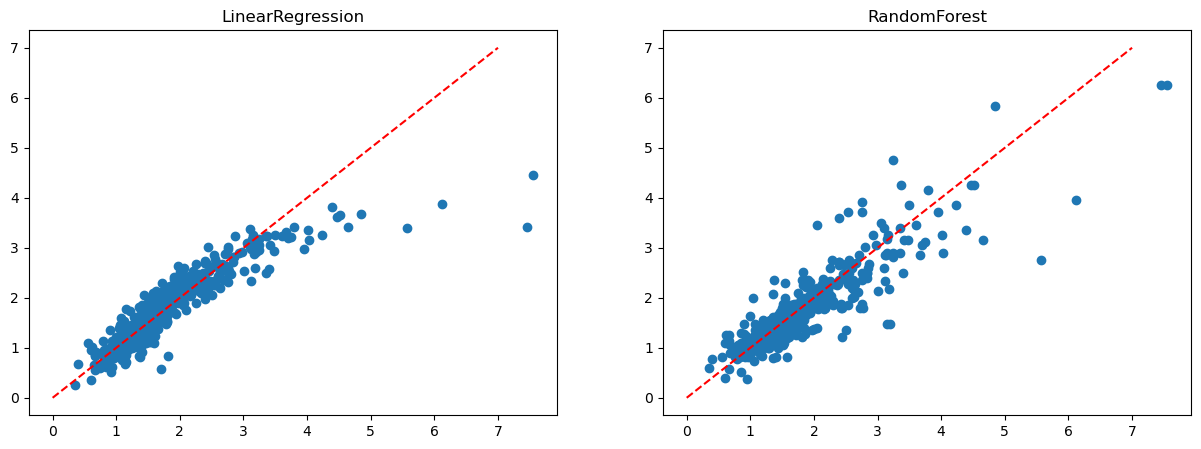

In [64]:
fig, ax = plt.subplots(ncols = 2, figsize = (15, 5))

ax[0].scatter(y_test/100000, previsao/100000)
ax[0].plot([0, 7], [0, 7], '--r') #Plota uma linha pontilhada vermelha ('--r'), O uso de [0, 7] no código original foi um exemplo baseado em suposições para simplificação.
ax[0].set_title('LinearRegression')

ax[1].scatter(y_test/100000, previsao_RF/100000)
ax[1].plot([0, 7], [0, 7], '--r')
ax[1].set_title('RandomForest')

Fazer a previsão para os testes de competição do Kaggle

In [71]:
#Importar a base de teste
teste = pd.read_csv('test.csv')

In [72]:
#Visualizar a base de teste
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [74]:
#Eliminar as mesmas colunas do treino 
teste = teste.drop(colunas_para_remover, axis=1)

In [75]:
#Aplicar as mesmas tecnicas de limpeza do treino 
#Ficar apenas com as colunas numericas
colunas_test_num = teste.columns [teste.dtypes != 'object']
colunas_test_num

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [76]:
#Manter apenas as colunas numericas
teste = teste.loc[:, colunas_test_num]

In [78]:
#Verificando os tipos de colunas que ficaram
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [80]:
#Verificar os valores vazios
teste.isnull().sum().sort_values(ascending = False).head(15)

GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
BsmtUnfSF         1
GarageCars        1
GarageArea        1
BsmtFinSF1        1
BsmtFinSF2        1
TotalBsmtSF       1
OpenPorchSF       0
WoodDeckSF        0
Id                0
EnclosedPorch     0
TotRmsAbvGrd      0
dtype: int64

In [81]:
#Atribuir o mesmo valor da base de treino -1
teste = teste.fillna(-1)

Agora vamos utilizar nossa base de treino com o teste da competição 

In [83]:
#Usaremos a Regressãso Linear pois tivemos a menor taxa de erro 
test_predict = reg.predict(teste)

In [84]:
#Vamos colocar essa coluna em nossa base de dados 
#A base de dados de teste não veio com a coluna de saleprice, exatamente porque iamos testar e adicionar
teste['SalePrice'] = test_predict

In [85]:
#Visualizar
teste.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,122234.995960
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,139178.263684
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,169872.054251
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,360,36,0,0,0,0,0,6,2010,199138.801656
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,82,0,0,144,0,0,1,2010,196257.109229


In [87]:
#Buscar apenas Id e Sale Price
Resultado = teste[['Id', 'SalePrice']]
Resultado.head()

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251
3,1464,199138.801656
4,1465,196257.109229


In [89]:
#Exportar resultado
Resultado.to_csv('Resultado.csv', index = False)